In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

!pip install opendatasets

In [5]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahaninduwara112
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification


100%|██████████| 121M/121M [00:00<00:00, 1.22GB/s]

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0, ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import AdamW


In [25]:
# Data directory
data_dir = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images"

# Create datasets with proper class structure
training_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'  # Important for multi-class
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

Found 13901 files belonging to 6 classes.
Using 11121 files for training.
Found 13901 files belonging to 6 classes.
Using 2780 files for validation.


In [26]:

# Get class names
class_names = training_set.class_names
num_classes = len(class_names)
print(f"Classes found: {class_names}")
print(f"Number of classes: {num_classes}")


Classes found: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


In [30]:

# --- Base Model ---
base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base.trainable = False  # freeze base layers for transfer learning

# --- Custom Classification Head ---
x = GlobalAveragePooling2D()(base.output)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# --- Combine Base + Head ---
model = Model(inputs=base.input, outputs=output)

# --- Optimizer ---
optimizer = AdamW(learning_rate=1e-4)

# --- Compile Model ---
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# --- Model Training ---
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=15,              # you can adjust this (e.g., 20–30)
    callbacks=callbacks,    # if you defined EarlyStopping, ReduceLROnPlateau, etc.
    verbose=1
)

Epoch 1/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 65s 155ms/step - accuracy: 0.3283 - loss: 1.8371 - val_accuracy: 0.6878 - val_loss: 0.8637
Epoch 2/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 39s 113ms/step - accuracy: 0.6529 - loss: 0.9433 - val_accuracy: 0.7730 - val_loss: 0.6535
Epoch 3/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.7380 - loss: 0.7236 - val_accuracy: 0.8014 - val_loss: 0.5652
Epoch 4/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 41s 114ms/step - accuracy: 0.7778 - loss: 0.6307 - val_accuracy: 0.8201 - val_loss: 0.5138
Epoch 5/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.7963 - loss: 0.5712 - val_accuracy: 0.8299 - val_loss: 0.4787
Epoch 6/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 40s 114ms/step - accuracy: 0.8212 - loss: 0.5308 - val_accuracy: 0.8345 - val_loss: 0.4550
Epoch 7/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.8295 - loss: 0.4879 - val_accuracy: 0.8460 - val_loss: 0.4347
Epoch 8/15
348/348 ━━━━━━━━━━━━━━━━━━━━ 40s 115ms/step - accuracy: 0.8357 - loss: 0

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/garbage-dataset-classification/Garbage_Dataset_Classification/images/paper/paper_00005.jpg'

img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)


img_array = np.expand_dims(img_array, axis=0)

preprocessed_image = img_array / 255.0


In [33]:
prediction = model.predict(preprocessed_image)
prediction,prediction.shape


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(array([[0.27348444, 0.46053427, 0.0095255 , 0.04227063, 0.02902025,
         0.18516494]], dtype=float32),
 (1, 6))

In [34]:
result_index = np.argmax(prediction)
result_index


np.int64(1)

In [35]:
result_index = np.argmax(prediction)
result_index


np.int64(1)

In [36]:

train_loss,train_acc = model.evaluate(training_set)

348/348 ━━━━━━━━━━━━━━━━━━━━ 35s 101ms/step - accuracy: 0.9044 - loss: 0.2951


In [37]:

val_loss,val_acc = model.evaluate(validation_set)

87/87 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8825 - loss: 0.3563


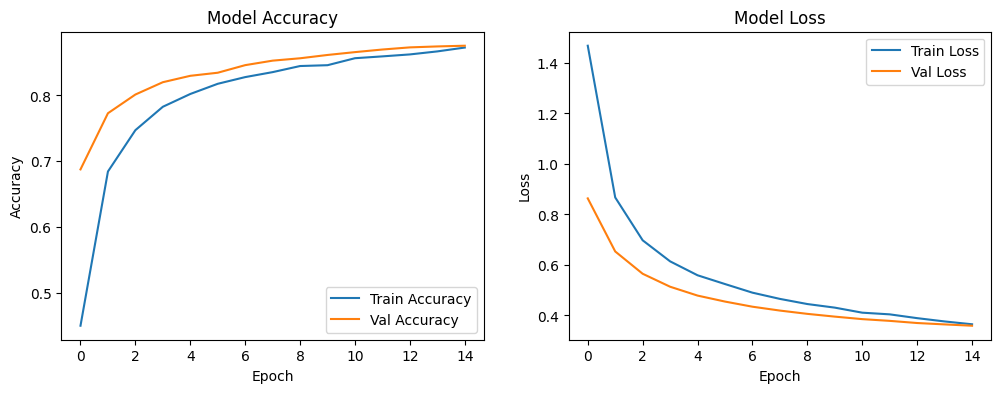

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Training Loss: {train_loss:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


Training Accuracy: 0.9042
Validation Accuracy: 0.8755
Training Loss: 0.2984
Validation Loss: 0.3594


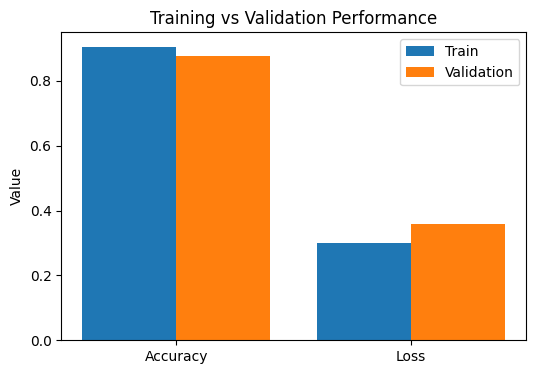

In [41]:
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Loss']
train_metrics = [train_acc, train_loss]
val_metrics = [val_acc, val_loss]

x = range(len(labels))
plt.figure(figsize=(6,4))
plt.bar(x, train_metrics, width=0.4, label='Train', align='center')
plt.bar([i+0.4 for i in x], val_metrics, width=0.4, label='Validation', align='center')

plt.xticks([i+0.2 for i in x], labels)
plt.title('Training vs Validation Performance')
plt.ylabel('Value')
plt.legend()

plt.show()